# Regresión Logística Multiple

## Datos

In [1]:
import pandas as pd

In [2]:
path = r'~/Documents/GitHub/Supervisado/dataset/datos3.csv'
datos = pd.read_csv(path)

## Descripción de datos

In [3]:
datos.head()

,make,address,capitalAve,capitalLong,tipo
0,0.00,0.64,3.756,61,1
1,0.21,0.28,5.114,101,1
2,0.06,0.00,9.821,485,1
3,0.00,0.00,3.537,40,1
4,0.00,0.00,3.537,40,1


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         100 non-null    float64
 1   address      100 non-null    float64
 2   capitalAve   100 non-null    float64
 3   capitalLong  100 non-null    int64  
 4   tipo         100 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [5]:
datos.describe()

,make,address,capitalAve,capitalLong,tipo
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.055800,0.078300,3.188160,37.150000,0.500000
std,0.172663,0.210291,3.708639,73.553303,0.502519
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.721750,6.000000,0.000000
50%,0.000000,0.000000,2.415000,12.000000,0.500000
75%,0.000000,0.000000,3.735000,32.750000,1.000000
max,1.170000,1.280000,35.461000,485.000000,1.000000


Número de observaciones por clase

In [6]:
datos.tipo.value_counts().sort_index()

0    50
1    50
Name: tipo, dtype: int64

## Exploración gráfica

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [8]:
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

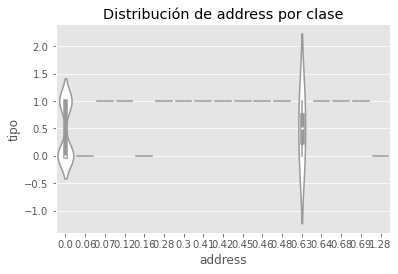

In [9]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'address',
        y     = 'tipo',
        data  = datos,
        color = "white",
        ax    = ax
    )

ax.set_title('Distribución de address por clase');

In [10]:
import numpy as np

In [11]:
datos['dira'] = np.where(datos['address'] > 0.15, 1, 0)

Número de observaciones por dira

In [12]:
datos.dira.value_counts().sort_index()

0    86
1    14
Name: dira, dtype: int64

In [13]:
datos.describe()

,make,address,capitalAve,capitalLong,tipo,dira
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.055800,0.078300,3.188160,37.150000,0.500000,0.140000
std,0.172663,0.210291,3.708639,73.553303,0.502519,0.348735
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.721750,6.000000,0.000000,0.000000
50%,0.000000,0.000000,2.415000,12.000000,0.500000,0.000000
75%,0.000000,0.000000,3.735000,32.750000,1.000000,0.000000
max,1.170000,1.280000,35.461000,485.000000,1.000000,1.000000


## Preparación de los datos

Imputador

In [14]:
from sklearn.impute import SimpleImputer

Estandarizador

In [15]:
from sklearn.preprocessing import StandardScaler

Pipeline

In [16]:
from sklearn.pipeline import Pipeline

Definición del pipeline

In [17]:
num_pipeline = Pipeline([
        ("imputador", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

Para transformar columnas

In [18]:
from sklearn.compose import ColumnTransformer

Atributos de variables numéricas

In [19]:
num_attribs = list(datos)

Definición del fullpipeline

In [20]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

El pipeline en acción

In [21]:
datos_prepared = full_pipeline.fit_transform(datos)

Variable predictra

In [22]:
X = datos.drop(columns = ['address','tipo'])

Variable predicha

In [23]:
y = datos['tipo']

División de los datos en train y test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.9,
                                        random_state = 42,
                                        shuffle      = True
                                    )

## Ajuste del modelo

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X = X_train, y = y_train)

LogisticRegression()

Información del modelo

In [28]:
print("Intercepto:", model.intercept_)

Intercepto: [-1.26921027]


In [29]:
print("Coeficiente:", model.coef_.flatten())

Coeficiente: [ 5.18276626e-01  3.98134894e-01 -3.03737050e-04  7.10328944e-01]


In [30]:
print("Accuracy de entrenamiento:", model.score(X_train, y_train))

Accuracy de entrenamiento: 0.6777777777777778


Recta de regresión:

$y = -1.269+0.518{make}+0.398{capitalAve}-0.000304{capitalLong}+0.710{dira}$

## Predicción de probabilidades

In [31]:
y_prob = model.predict_proba(X = X_test)
y_prob = pd.DataFrame(y_prob, columns = model.classes_)
y_prob.head(3)

,0,1
0,0.567961,0.432039
1,0.651211,0.348789
2,0.421576,0.578424


## Predicción de clases

In [32]:
y_class = model.predict(X = X_test)
y_class

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

## Predicción nueva

Nueva entrada

In [33]:
variables = ['make', 'capitalAve', 'capitalLong', 'dira']

In [34]:
x_nueva = pd.DataFrame(np.array([[0.01, 1.000, 32, 0]]), columns = variables)

Estandarización de nueva entrada

In [35]:
num_attribs = list(x_nueva)

In [36]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

In [37]:
x_nueva_prepared = full_pipeline.fit_transform(x_nueva)

Clase predicha

In [38]:
clase_predicha = model.predict(x_nueva)
clase_predicha

array([0], dtype=int64)

Probabilidad de pertencia

In [39]:
clase_predicha_prob =model.predict_proba(x_nueva)

In [40]:
print("Pr(tipo = 0|x_nueva) = %.4f" % clase_predicha_prob[0,0],",",
      "\nPr(tipo = 1|x_nueva) =%.4f" % clase_predicha_prob[0,1],".")

Pr(tipo = 0|x_nueva) = 0.7059 , 
Pr(tipo = 1|x_nueva) =0.2941 .


Elaborado por Jairo Rojas